In [75]:
"""Librairies nécessaires"""
import pandas as pd
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.backends.backend_agg import FigureCanvasAgg
import os

In [56]:
"""Changement de directory pour lire les fichiers"""
import os
os.getcwd() #trouver le directory actuel 
os.chdir('/home/onyxia/work/Projet-Stat-App-2A')

In [62]:
"""Chargement fichier dvf"""

path_folder = '3.2) Données finales/'
name_file = 'dvf_final_2021_to_2023.geojson'
path_file = path_folder + name_file

dvf = gpd.read_file(path_file)

In [63]:
print(dvf.columns)
print(dvf.shape)

Index(['id_mutation', 'date_mutation', 'prix', 'log_prix',
       'nombre_pieces_principales', 'surface_reelle_bati', 'surface_carrez',
       'nombre_dependances', 'prix_au_m2_carrez', 'prix_au_m2_reel_bati',
       'adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune',
       'nom_arrondissement', 'num_arrondissement', 'nom_quartier',
       'dist_min_parc', 'nom_esp_vert_proche', 'closest_site_tour',
       'dist_min_site_tour', 'closest_stat', 'dist_min_stat', 'num_ligne',
       'closest_lycee', 'dist_min_lycee', 'dist_min_log_social',
       'ind_proxi_parc', 'ind_proxi_site_tour', 'ind_proxi_stat',
       'ind_proxi_lycee', 'ind_proxi_log_social', 'longitude', 'latitude',
       'geometry'],
      dtype='object')
(59417, 35)


In [70]:
"""Choix des variables à mettre dans la régression"""

var_a_expliquer = 'log_prix'

var_explicatives_base = ['nombre_pieces_principales', 'surface_reelle_bati', 'nombre_dependances']

var_explicatives_avec_dist = ['nombre_pieces_principales', 'surface_reelle_bati', 'nombre_dependances',
                              'dist_min_parc', 'dist_min_site_tour', 'dist_min_stat', 'dist_min_lycee', 
                              'dist_min_log_social']

var_explicatives_avec_ind_dist = ['nombre_pieces_principales', 'surface_reelle_bati', 'nombre_dependances',
                                'ind_proxi_parc', 'ind_proxi_site_tour', 'ind_proxi_stat',
                                'ind_proxi_lycee', 'ind_proxi_log_social']

In [73]:
"""Fonction qui réalise une régression linéaire simple multivariée"""

def regression_lineaire_multivariable(dvf, variables_explicatives, variable_a_expliquer, output_folder):
    # Sélectionner les colonnes spécifiées
    colonnes = variables_explicatives + [variable_a_expliquer]
    df_selected = dvf[colonnes].dropna()

    # Extraire les valeurs de X et y
    X = df_selected[variables_explicatives]
    y = df_selected[variable_a_expliquer]

    # Ajouter une colonne de constante pour l'intercept
    X = sm.add_constant(X)

    # Initialiser le modèle de régression linéaire
    model = sm.OLS(y, X).fit()

    # Nom du jeu de variables explicatives
    var_exp_name = '_'.join(variables_explicatives)

    # Créer une figure textuelle avec le résumé de la régression
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')  # Masquer les axes
    ax.text(0, 0.95, str(model.summary()), va='top', ha='left', fontsize=10, family='monospace')

    # Sauvegarder la figure de résumé en format JPEG avec spécification de la résolution (dpi)
    summary_image_path = os.path.join(output_folder, f'regression_summary_{var_exp_name}.jpg')
    fig.savefig(summary_image_path, format='jpeg', dpi=300)
    print(f"Résumé de régression exporté avec succès dans : {summary_image_path}")

    # Prédire les valeurs de y en fonction de X
    y_pred = model.predict(X)

    # Tracer la régression linéaire
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, color='black')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='blue', linewidth=3, label='Régression linéaire')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.legend()

    # Sauvegarder le graphique en format JPEG avec spécification de la résolution (dpi)
    regression_plot_path = os.path.join(output_folder, f'regression_plot_{var_exp_name}.jpg')
    plt.savefig(regression_plot_path, format='jpeg', dpi=150)
    print(f"Graphique de régression exporté avec succès dans : {regression_plot_path}")

    # Afficher le graphique
    plt.show()

Résumé de régression exporté avec succès dans : 4) Modélisation/1) Regression_lineaire_simple/regression_summary_nombre_pieces_principales_surface_reelle_bati_nombre_dependances.jpg
Graphique de régression exporté avec succès dans : 4) Modélisation/1) Regression_lineaire_simple/regression_plot_nombre_pieces_principales_surface_reelle_bati_nombre_dependances.jpg


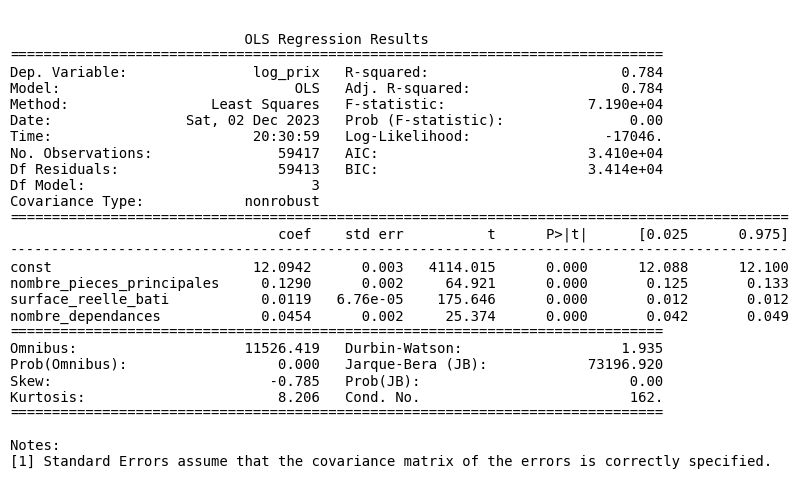

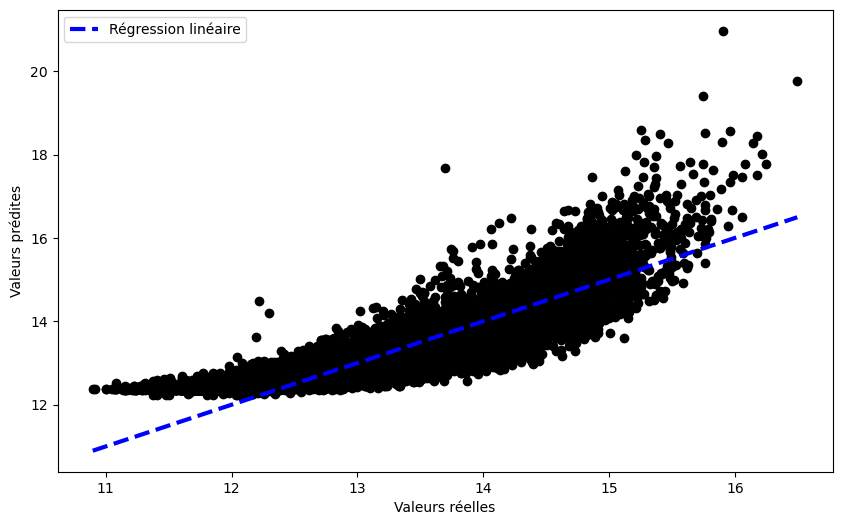

Résumé de régression exporté avec succès dans : 4) Modélisation/1) Regression_lineaire_simple/regression_summary_nombre_pieces_principales_surface_reelle_bati_nombre_dependances_dist_min_parc_dist_min_site_tour_dist_min_stat_dist_min_lycee_dist_min_log_social.jpg
Graphique de régression exporté avec succès dans : 4) Modélisation/1) Regression_lineaire_simple/regression_plot_nombre_pieces_principales_surface_reelle_bati_nombre_dependances_dist_min_parc_dist_min_site_tour_dist_min_stat_dist_min_lycee_dist_min_log_social.jpg


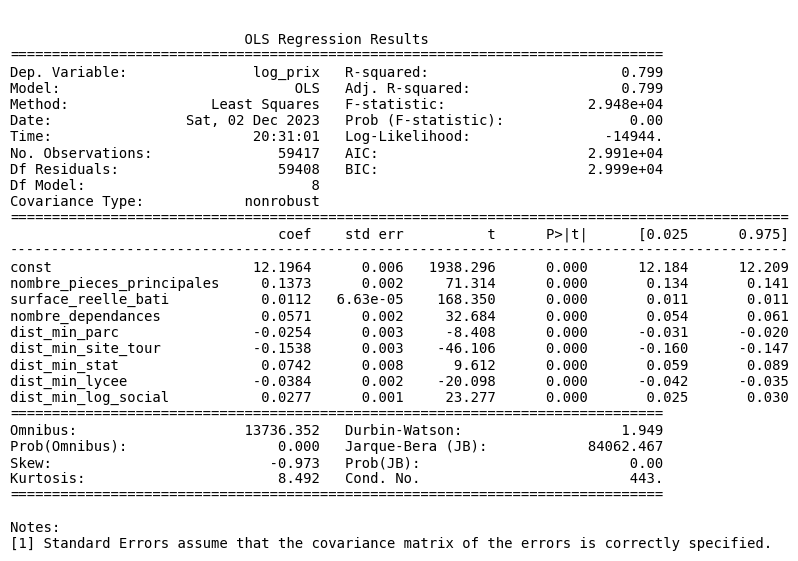

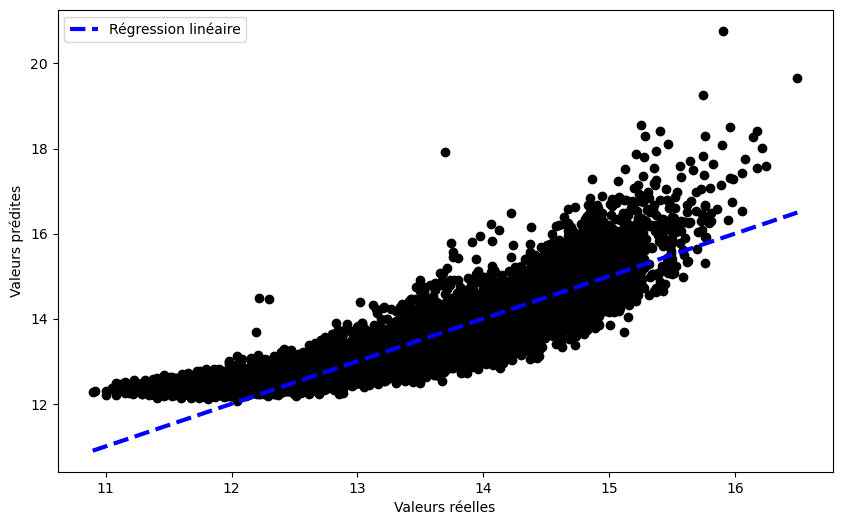

Résumé de régression exporté avec succès dans : 4) Modélisation/1) Regression_lineaire_simple/regression_summary_nombre_pieces_principales_surface_reelle_bati_nombre_dependances_ind_proxi_parc_ind_proxi_site_tour_ind_proxi_stat_ind_proxi_lycee_ind_proxi_log_social.jpg
Graphique de régression exporté avec succès dans : 4) Modélisation/1) Regression_lineaire_simple/regression_plot_nombre_pieces_principales_surface_reelle_bati_nombre_dependances_ind_proxi_parc_ind_proxi_site_tour_ind_proxi_stat_ind_proxi_lycee_ind_proxi_log_social.jpg


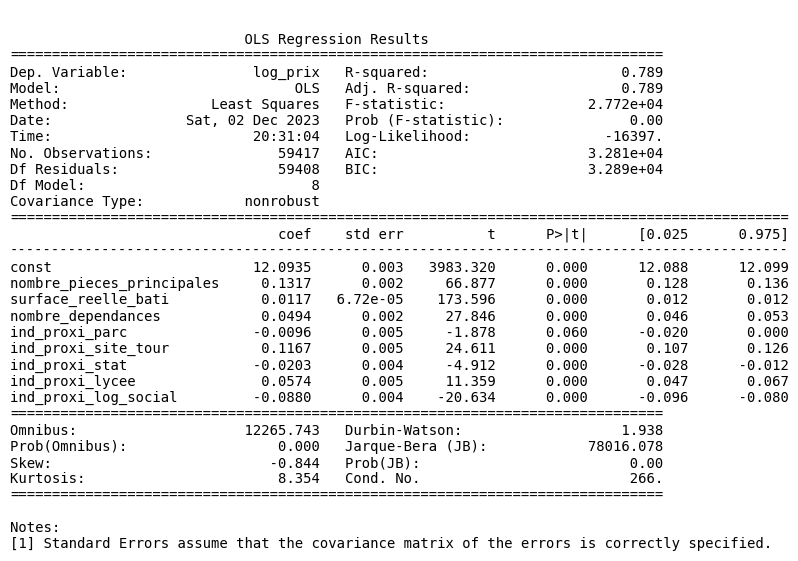

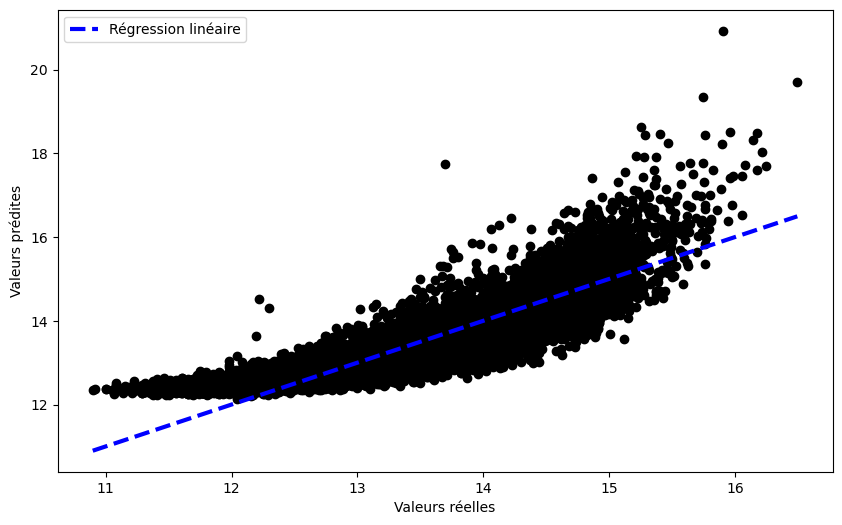

In [74]:
# Définir le chemin de sortie
output_folder = '4) Modélisation/1) Regression_lineaire_simple/'

# Premier jeu de variables explicatives
regression_lineaire_multivariable(dvf, var_explicatives_base, var_a_expliquer, output_folder)

# Deuxième jeu de variables explicatives
regression_lineaire_multivariable(dvf, var_explicatives_avec_dist, var_a_expliquer, output_folder)

# Troisième jeu de variables explicatives
regression_lineaire_multivariable(dvf, var_explicatives_avec_ind_dist, var_a_expliquer, output_folder)
